In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows',800)
pd.set_option('display.max_columns',15)
pd.set_option('display.width',1000)

In [3]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\27th Nov - Stats and ML Batch\\LogisticRegression'

In [59]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#!pip install dtale

In [9]:
import dtale
#import dtale.app as dtale_app

In [10]:
dtale.show(dataset)

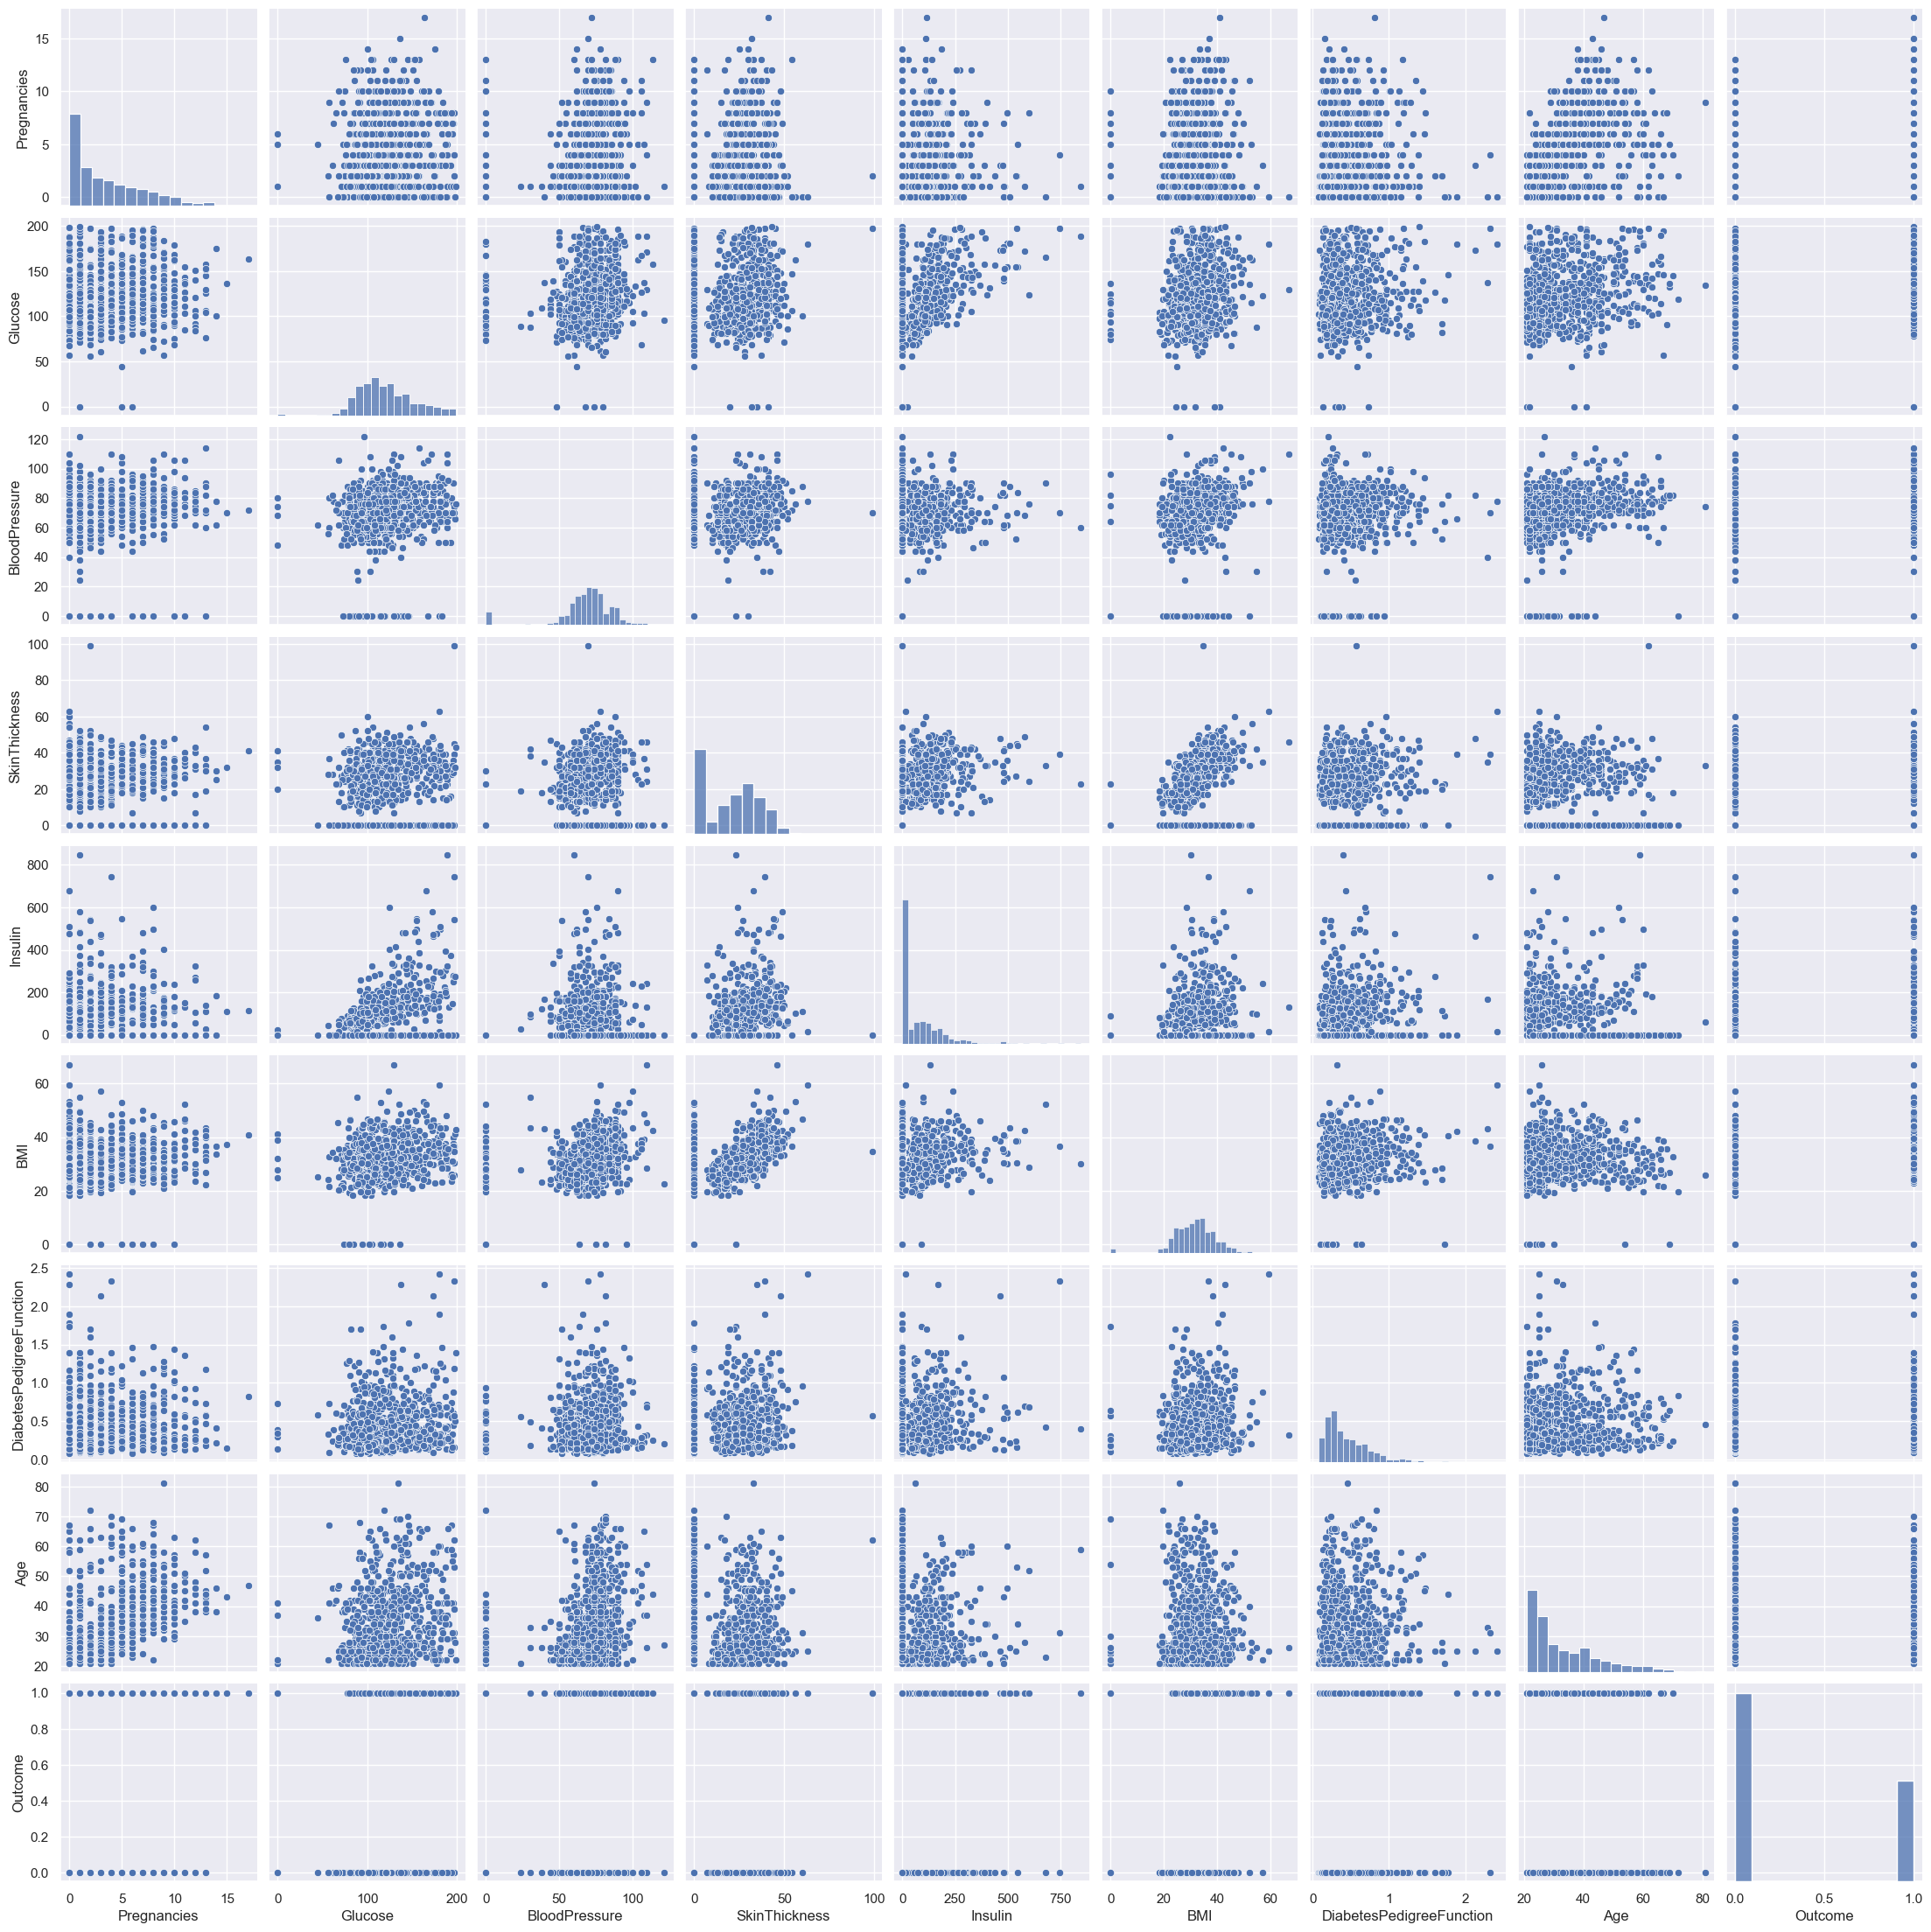

In [11]:
sns.pairplot(dataset)

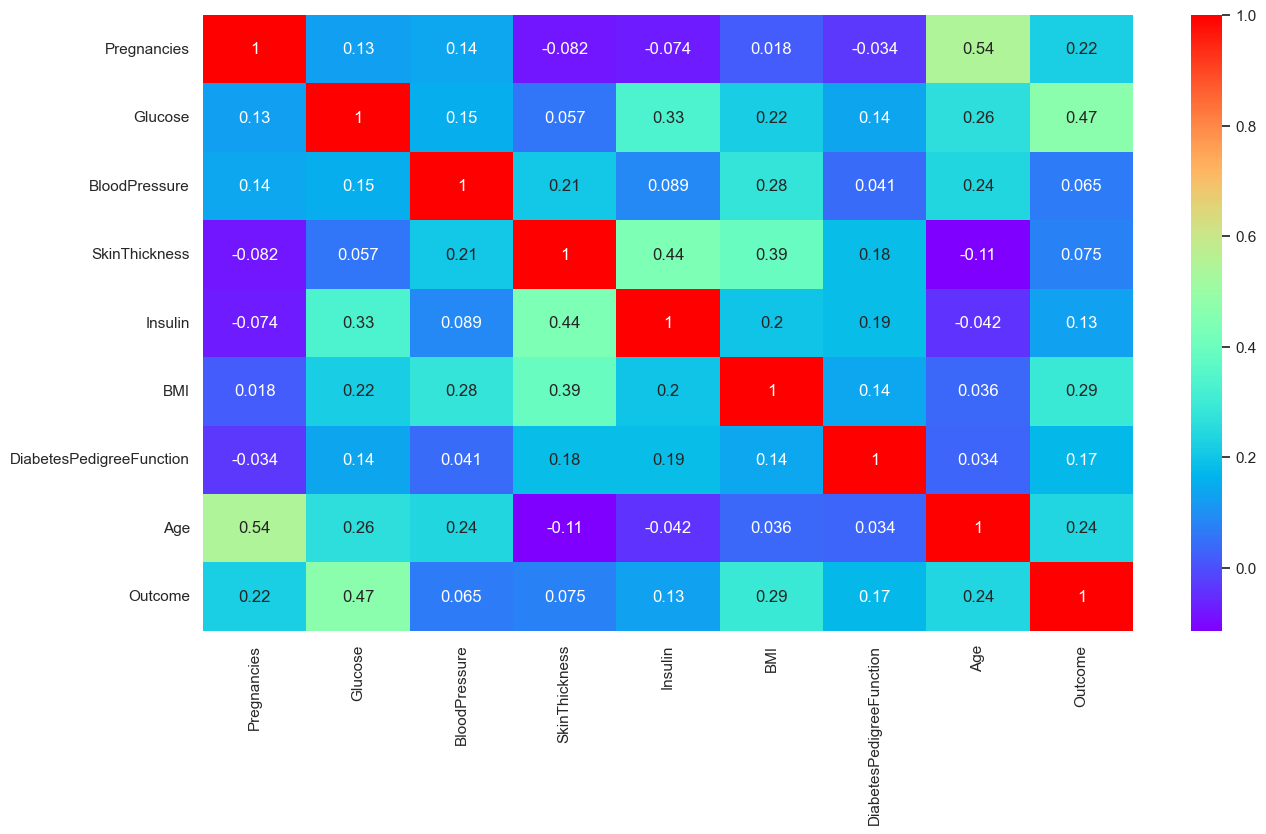

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')
plt.show()

In [14]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
dataset['Glucose'].value_counts()/len(dataset)*100

99     2.213542
100    2.213542
111    1.822917
129    1.822917
125    1.822917
106    1.822917
112    1.692708
108    1.692708
95     1.692708
105    1.692708
102    1.692708
122    1.562500
109    1.562500
117    1.432292
124    1.432292
90     1.432292
107    1.432292
128    1.432292
120    1.432292
119    1.432292
114    1.432292
115    1.302083
84     1.302083
146    1.171875
101    1.171875
92     1.171875
88     1.171875
97     1.171875
91     1.171875
126    1.171875
103    1.171875
123    1.171875
136    1.041667
96     1.041667
139    1.041667
158    1.041667
137    1.041667
130    0.911458
94     0.911458
93     0.911458
144    0.911458
85     0.911458
87     0.911458
147    0.911458
116    0.911458
151    0.781250
83     0.781250
173    0.781250
81     0.781250
80     0.781250
134    0.781250
162    0.781250
143    0.781250
154    0.781250
104    0.781250
121    0.781250
89     0.781250
110    0.781250
118    0.781250
155    0.651042
132    0.651042
127    0.651042
142    0

In [60]:
dataset['Glucose'] = np.where(dataset['Glucose']==0,117,dataset['Glucose'])

In [61]:
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0,72,dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0,23,dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0,30,dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0,32,dataset['BMI'])

In [62]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.408854,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.695978,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30,33.6,0.627,50,1
1,1,85,66,29,30,26.6,0.351,31,0


## ***********************

In [20]:
# sigmoid = (1 / 1 + e^-y)
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [21]:
sigmoid(5)

0.9933071490757153

In [22]:
sigmoid(1000)

1.0

In [23]:
sigmoid(-5)

0.0066928509242848554

In [24]:
sigmoid(-5000)

0.0

## ***************************************

In [63]:
# Check data is balance or not ?
dataset['Outcome'].value_counts()/len(dataset)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [64]:
# Split the data into ind variable and dep variable
x = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [28]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30,33.6,0.627,50
1,1,85,66,29,30,26.6,0.351,31
2,8,183,64,23,30,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [29]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [65]:
# imblance to balance the data
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sam, y_sam = ros.fit_resample(x,y)
print("original data :", y.value_counts())
print("After oversampling data :", y_sam.value_counts())

original data : 0    500
1    268
Name: Outcome, dtype: int64
After oversampling data : 1    500
0    500
Name: Outcome, dtype: int64


In [67]:
x_sam

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30,33.6,0.627,50
1,1,85,66,29,30,26.6,0.351,31
2,8,183,64,23,30,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
995,11,136,84,35,130,28.3,0.260,42
996,7,168,88,42,321,38.2,0.787,40
997,8,105,100,36,30,43.3,0.239,45
998,2,197,70,99,30,34.7,0.575,62


In [68]:
y_sam

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25,random_state=101,stratify=y_sam) 
# stratify means it will ensure to split the data for both (0 and 1) into train and test dataset

In [81]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Building Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='ovr')
logit_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [83]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

# Evaluation metrics

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [85]:
print(confusion_matrix(y_train, y_pred_train))
print("**************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[298  77]
 [ 90 285]]
********************************************************************************************************************************************
[[101  24]
 [ 43  82]]


In [86]:
print(classification_report(y_train, y_pred_train))
print("**************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       375
           1       0.79      0.76      0.77       375

    accuracy                           0.78       750
   macro avg       0.78      0.78      0.78       750
weighted avg       0.78      0.78      0.78       750

********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       125
           1       0.77      0.66      0.71       125

    accuracy                           0.73       250
   macro avg       0.74      0.73      0.73       250
weighted avg       0.74      0.73      0.73       250



In [87]:
print("Training Accuracy Score", accuracy_score(y_train, y_pred_train))
print("**************"*10)
print("Test Accuracy Score", accuracy_score(y_test, y_pred_test))

Training Accuracy Score 0.7773333333333333
********************************************************************************************************************************************
Test Accuracy Score 0.732


# K-Fold method

In [88]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model, x_train, y_train, cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())

[0.8        0.70666667 0.78666667 0.77333333 0.76       0.82666667
 0.76       0.8        0.69333333 0.8       ]

0.7706666666666666

0.8266666666666667


# ROC-AUC curve

In [89]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7320000000000001

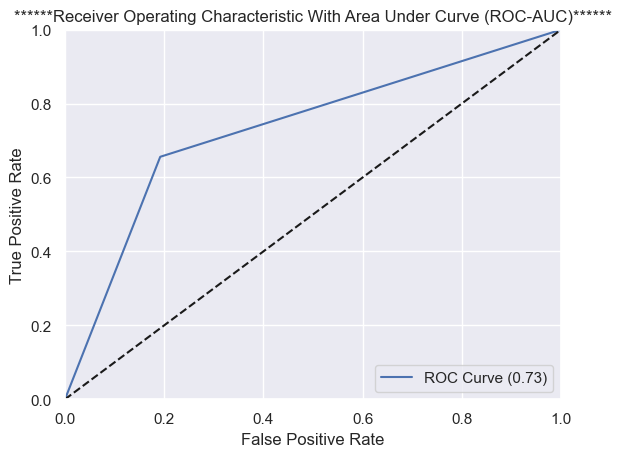

In [93]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()